 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns and Set date as index
csvpath = Path("whale_returns.csv")
whale_return = pd.read_csv(csvpath, index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_return

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [4]:
# Count nulls
whale_return.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls 
whale_return = whale_return.dropna()

In [6]:
# Check nulls count again
whale_return.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [7]:
# Sort the date by earliest to latest
whale_return.sort_index().head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [8]:
# Reading algorithmic returns and Set date as index
csvpath = Path("algo_returns.csv")
algo_return = pd.read_csv(csvpath, index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_return.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [9]:
# Count nulls
algo_return.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls 
algo_return = algo_return.dropna()

In [11]:
# Check nulls count again
algo_return.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [12]:
# Sort the date by earliest to latest
algo_return.sort_index().head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [56]:
# Reading S&P 500 Closing Prices
csvpath = Path("sp500_history.csv")
sp500_return = pd.read_csv(csvpath, index_col='Date', infer_datetime_format=True, parse_dates=True) 
sp500_return.sort_index(inplace=True)
sp500_return.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [57]:
# Check Data Types
sp500_return.dtypes

Close    object
dtype: object

In [58]:
# Remove "$"
sp500_return['Close'] = sp500_return['Close'].str.replace('$','')
sp500_return.head()

/Users/porsheaellis/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [59]:
# Change Data Types
sp500_return['Close'] = sp500_return['Close'].astype('float')
sp500_return.dtypes

Close    float64
dtype: object

In [60]:
# Calculate Daily Returns
sp500_daily = sp500_return.pct_change()
sp500_daily.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [61]:
# Drop nulls
sp500_daily = sp500_daily.dropna()
sp500_daily.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [62]:
# Rename `Close` Column to S&P 500
sp500_daily = sp500_daily.rename(columns={
    "Close": "S&P 500"
})

sp500_daily.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [66]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_1 = pd.concat([whale_return, algo_return, sp500_daily], axis='columns', join='inner')
joined_1.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

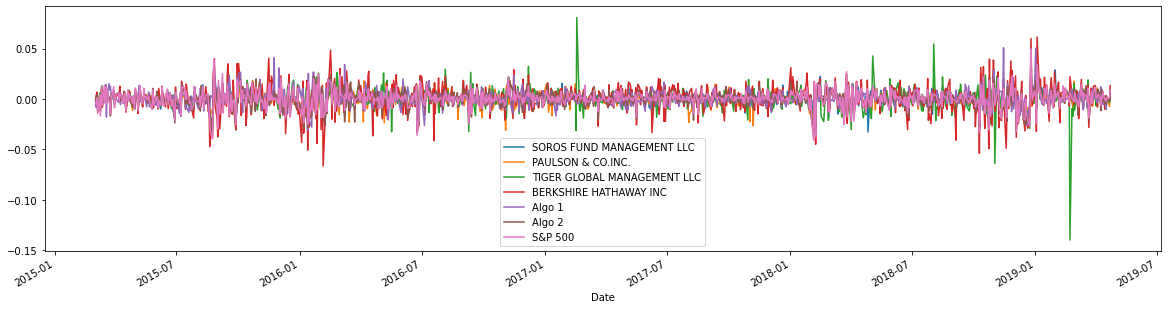

In [67]:
# Plot daily returns of all portfolios
joined_1.plot(figsize=(20,5))

#### Calculate and Plot cumulative returns.

In [97]:
# Calculate cumulative returns of all portfolios
cumlative_1 = (1 + joined_1).cumprod()
cumlative_1.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.995461
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.991093
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.992278
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.978214
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.982072


<AxesSubplot:xlabel='Date'>

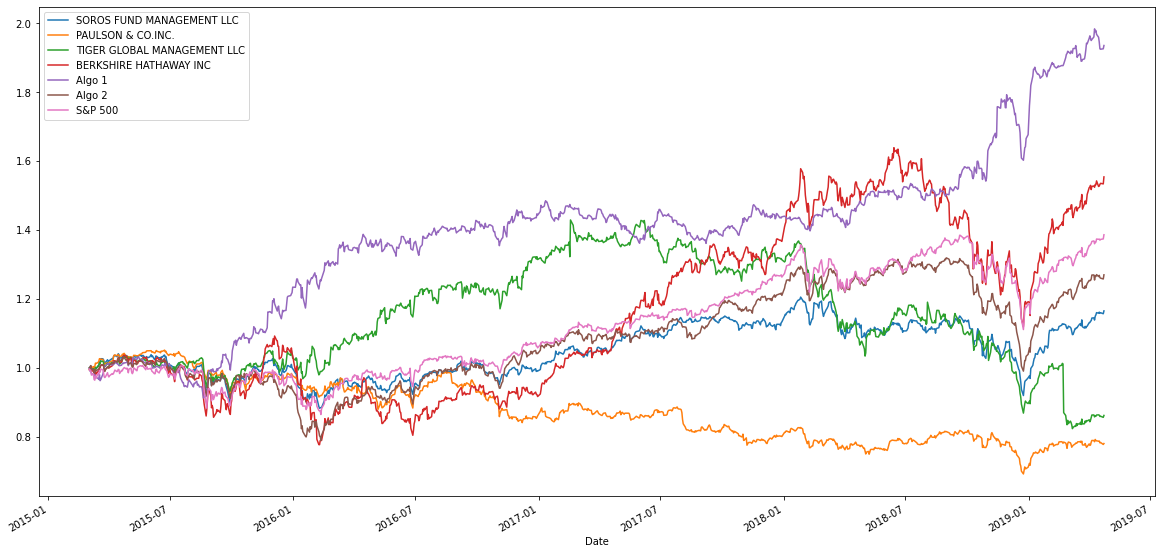

In [98]:
# Plot cumulative returns

cumlative_1.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

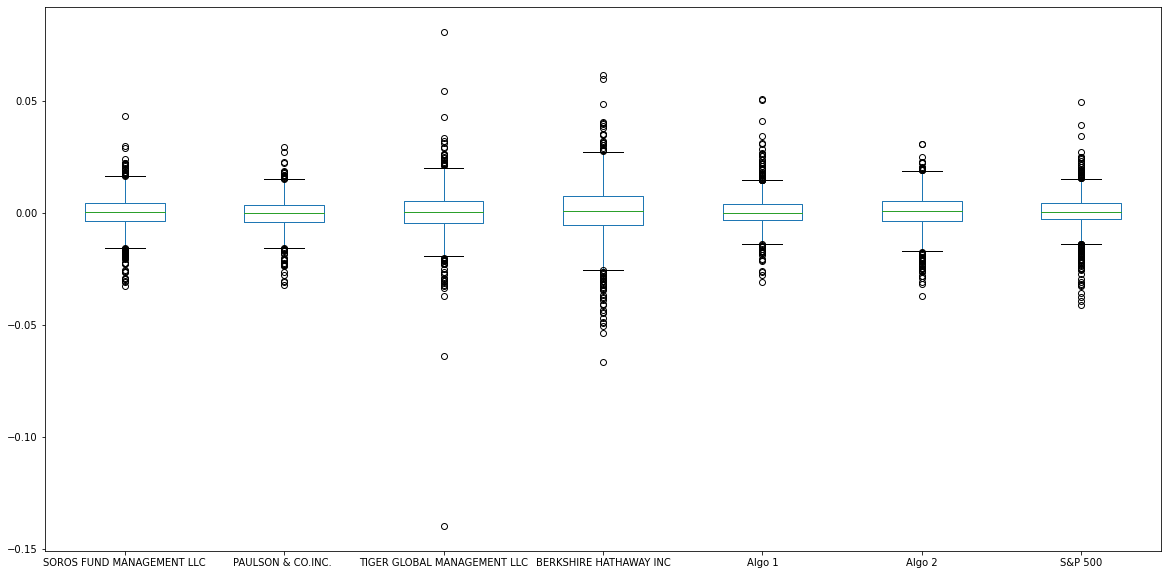

In [70]:
# Box plot to visually show risk
joined_1.plot.box(figsize=(20,10))  

### Calculate Standard Deviations

In [71]:
# Calculate the daily standard deviations of all portfolios
daily_std_1 = joined_1.std()
daily_std_1.head()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
dtype: float64

In [72]:
# sorting values
daily_std_1 = daily_std_1.sort_values(ascending=False)
daily_std_1.head(10)

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500                        0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Determine which portfolios are riskier than the S&P 500

The portfolios that are riskier than the S&P 500
are BERKSHIRE HATHAWAY INC with a STD of 0.012919 
and TIGER GLOBAL MANAGEMENT LLC with a STD of    0.010897
these porfolios have an STD greater than the S&P 500 which is .008587

### Calculate the Annualized Standard Deviation

In [73]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_1= daily_std_1 * np.sqrt(252)
annualized_std_1.head(10)

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P 500                        0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

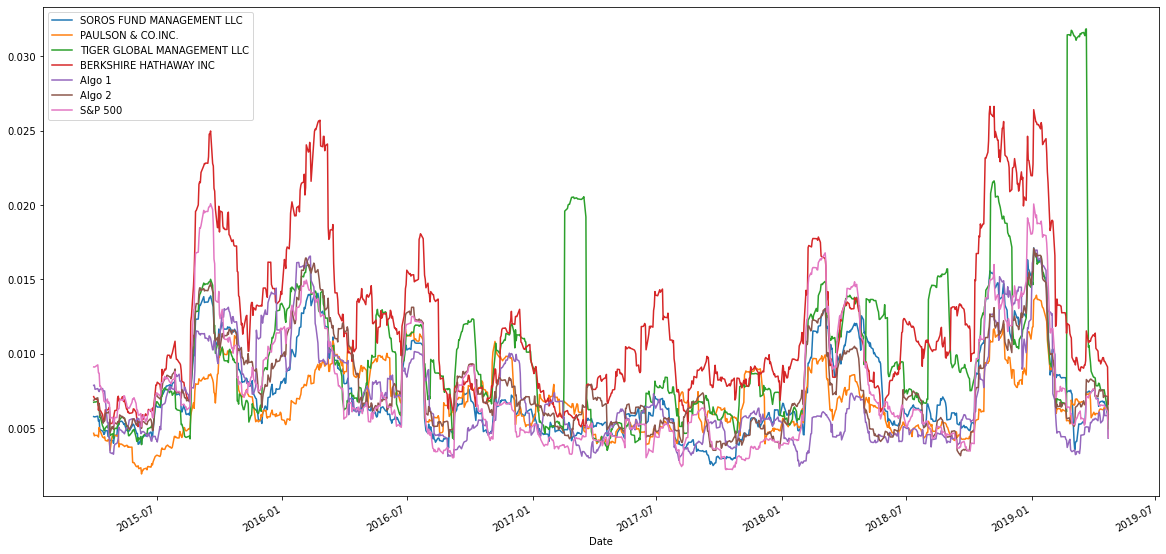

In [74]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

joined_1.rolling(window=21).std()

# Plot the rolling standard deviation
joined_1.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

In [75]:
# Calculate the correlation
Core_1 = joined_1.corr()
Core_1

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

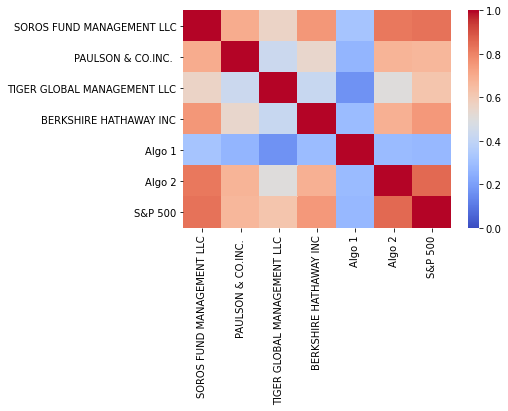

In [201]:
# Display de correlation matrix
sns.heatmap(Core_1, vmin=0, vmax=1, cmap='coolwarm')

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [127]:
# Calculate covariance of a single portfolio
covariance = joined_1['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(joined_1['S&P 500'])
covariance = covariance.dropna()
covariance

Date
2015-05-27    0.000031
2015-05-28    0.000031
2015-05-29    0.000031
2015-06-01    0.000031
2015-06-02    0.000029
                ...   
2019-04-16    0.000035
2019-04-17    0.000031
2019-04-18    0.000031
2019-04-22    0.000031
2019-04-23    0.000030
Length: 984, dtype: float64

In [128]:
# Calculate variance of S&P 500

variance = joined_1['S&P 500'].rolling(window=60).var()
variance = variance.dropna()
variance

Date
2015-05-27    0.000053
2015-05-28    0.000052
2015-05-29    0.000053
2015-06-01    0.000053
2015-06-02    0.000049
                ...   
2019-04-16    0.000041
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
2019-04-23    0.000037
Name: S&P 500, Length: 984, dtype: float64

In [129]:
# Computing beta
df_beta = covariance / variance
df_beta = df_beta.dropna()
df_beta

Date
2015-05-27    0.587678
2015-05-28    0.589662
2015-05-29    0.592375
2015-06-01    0.591645
2015-06-02    0.590608
                ...   
2019-04-16    0.840772
2019-04-17    0.822868
2019-04-18    0.823598
2019-04-22    0.825137
2019-04-23    0.806330
Length: 984, dtype: float64

<AxesSubplot:title={'center':'SOROS FUND MANAGEMENT LLC Beta'}, xlabel='Date'>

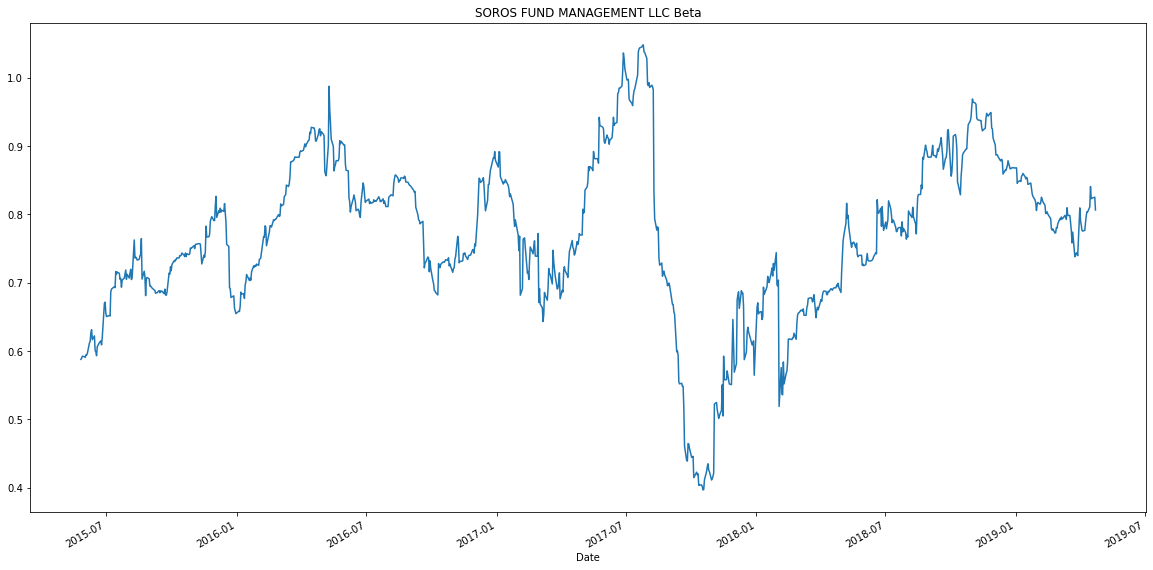

In [130]:
# Plot beta trend
df_beta.plot(figsize=(20,10), title='SOROS FUND MANAGEMENT LLC Beta')


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponentially Weighted Average - 21 Day Half-life'}, xlabel='Date'>

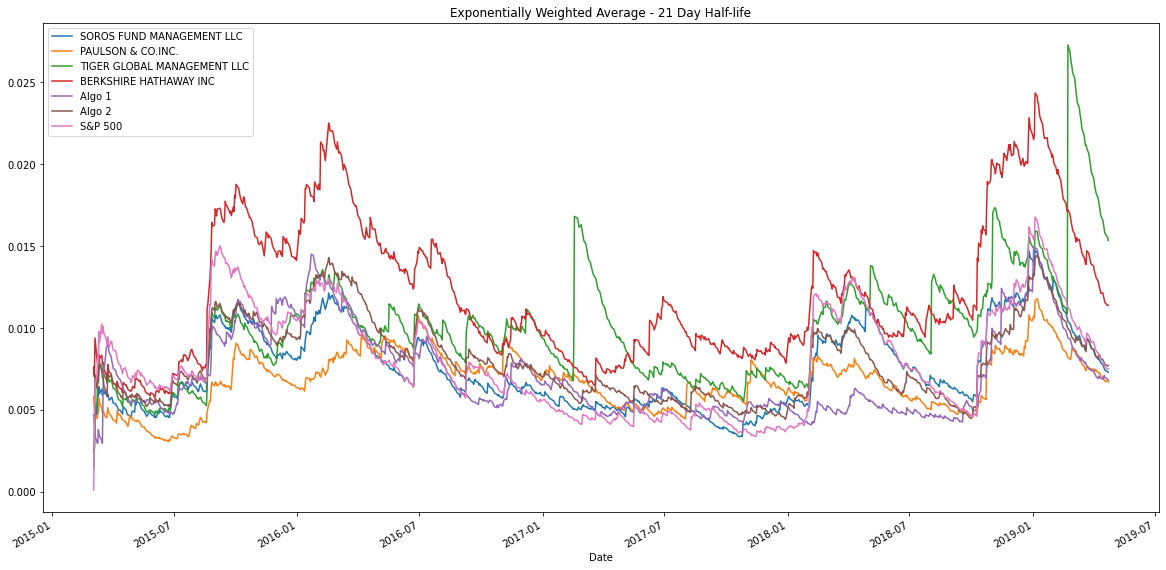

In [131]:
# Use `ewm` to calculate the rolling window
joined_1.ewm(halflife=21).std().plot(figsize=(20,10),title='Exponentially Weighted Average - 21 Day Half-life')


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [132]:
# Annualized Sharpe Ratios
sharpe_ratios = (joined_1.mean() * 252) / (daily_std_1 * np.sqrt(252)) 
sharpe_ratios.head(10)

Algo 1                         1.378648
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
PAULSON & CO.INC.             -0.483570
S&P 500                        0.648267
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

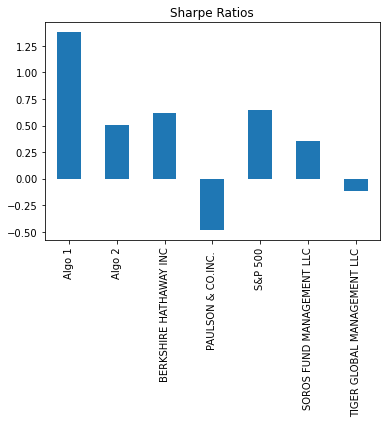

In [133]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

according to the Sharpe Ratio, Algo 1 out performed the entire whales portfolio and the market. While Algo 2 out performed 3 out of the 4 whales portfolios
When looking at the Corrolation matrix, Algo 1 almost has a zero correlation with the market while Algo 2 has a high postisitve correlation with the market.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [85]:
# Reading data from 1st stock
goog_csvpath = Path("goog_historical.csv")
goog_return = pd.read_csv(goog_csvpath,index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
goog_return.drop(columns=['Symbol'], inplace=True)
goog_return.head()

,NOCP
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [86]:
# Reading data from 2nd stock
aapl_csvpath = Path("aapl_historical.csv")
aapl_return = pd.read_csv(aapl_csvpath,index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
aapl_return.drop(columns=['Symbol'], inplace=True)
aapl_return.head()

,NOCP
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [87]:
# Reading data from 3rd stock
cost_csvpath = Path("cost_historical.csv")
cost_return = pd.read_csv(cost_csvpath,index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
cost_return.drop(columns=['Symbol'], inplace=True)
cost_return.head()

,NOCP
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [88]:
# Combine all stocks in a single DataFrame
join_stock = pd.concat([goog_return,aapl_return,cost_return], axis = "columns", join = "inner")
join_stock.sort_index(inplace=True)
join_stock.columns=['GOOG','AAPL','COST']
join_stock.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [89]:
# Reset Date index
daily_returns = join_stock.pct_change()
daily_returns.head()

# Drop NAs
daily_returns = daily_returns.dropna()

# Display sample data
daily_returns.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [146]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)

# Display sample data

portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [184]:
# Join your returns DataFrame to the original returns DataFrame
combine_df = pd.concat([joined_1,portfolio_returns], axis='columns', join='inner')
combine_df.sort_index(inplace=True)
combine_df.columns=['SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC.','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','Algo 1','Algo 2','S&P 500','Custom']
combine_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


In [150]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combine_df = combine_df.dropna()
combine_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [185]:
# Calculate the daily standard deviations of all portfolios
com_daily_std_1 = combine_df.std()
com_daily_std_1.head(10)

SOROS FUND MANAGEMENT LLC      0.009240
PAULSON & CO.INC.              0.007353
TIGER GLOBAL MANAGEMENT LLC    0.014648
BERKSHIRE HATHAWAY INC         0.015569
Algo 1                         0.008423
Algo 2                         0.008791
S&P 500                        0.009578
Custom                         0.013323
dtype: float64

In [186]:
# Calculate the annualized `std`
com_annualized_std_1= com_daily_std_1 * np.sqrt(252)
com_annualized_std_1.head(10)

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
Custom                         0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [187]:
# Calculate rolling standard deviation
combine_df.rolling(window=21).std().dropna()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2018-06-12,0.005177,0.004675,0.009127,0.008367,0.004459,0.004390,0.005925,0.006288
2018-06-13,0.005402,0.004694,0.009156,0.008636,0.004512,0.004550,0.006027,0.006462
2018-06-14,0.005469,0.004659,0.009157,0.008457,0.004583,0.004886,0.005774,0.006002
2018-06-15,0.005206,0.004564,0.009359,0.008770,0.004644,0.004875,0.005756,0.005783
2018-06-18,0.005177,0.004569,0.009449,0.008564,0.004459,0.004799,0.005784,0.005752
...,...,...,...,...,...,...,...,...
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498,0.007507
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537,0.007668
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470,0.007482
2019-04-22,0.005915,0.006400,0.006197,0.009104,0.005831,0.007113,0.006094,0.006539


<AxesSubplot:>

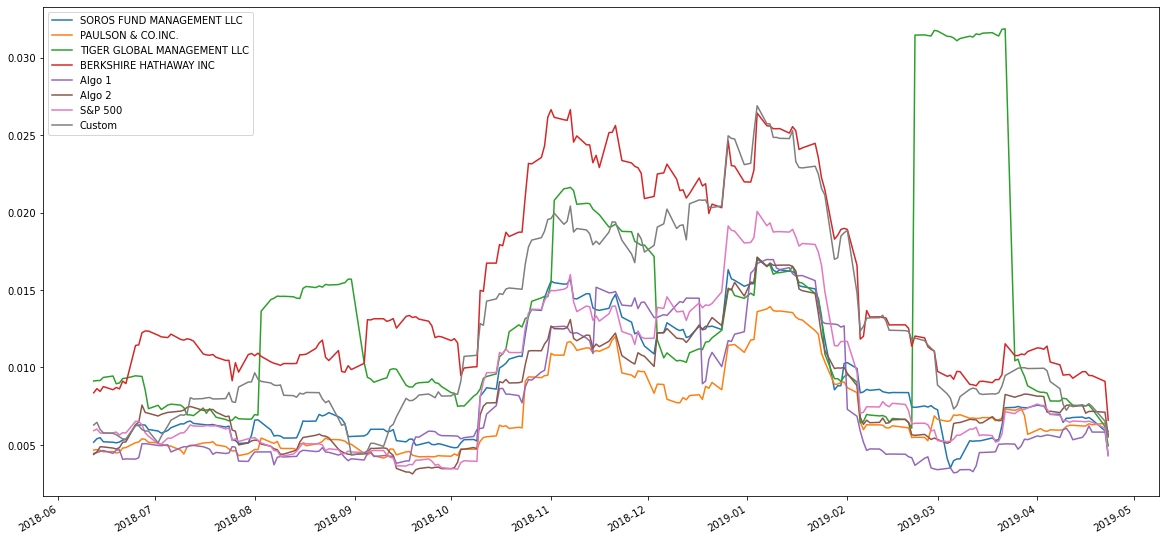

In [188]:
# Plot rolling standard deviation
combine_df.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

In [189]:
# Calculate the correlation
Core_2 = combine_df.corr()
Core_2

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
S&P 500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
Custom,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


<AxesSubplot:>

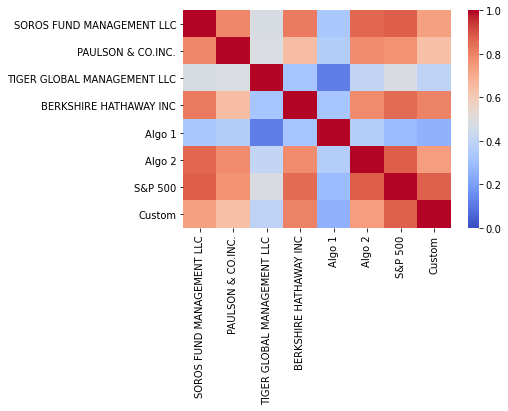

In [198]:
# Display de correlation matrix
sns.heatmap(Core_2, vmin=0, vmax=1, cmap='coolwarm')

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [191]:
# Calculate covariance of a single portfolio
covariance_2 = combine_df['Custom'].rolling(window=60).cov(combine_df['S&P 500'])
covariance_2 = covariance_2.dropna()
covariance_2

2018-08-07    0.000031
2018-08-08    0.000031
2018-08-09    0.000029
2018-08-10    0.000030
2018-08-13    0.000030
                ...   
2019-04-16    0.000048
2019-04-17    0.000042
2019-04-18    0.000042
2019-04-22    0.000042
2019-04-23    0.000042
Length: 178, dtype: float64

In [192]:
# Calculate variance of S&P 500

variance_2 = combine_df['S&P 500'].rolling(window=60).var()
variance_2 = variance_2.dropna()
variance_2

2018-08-07    0.000031
2018-08-08    0.000031
2018-08-09    0.000030
2018-08-10    0.000031
2018-08-13    0.000031
                ...   
2019-04-16    0.000041
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
2019-04-23    0.000037
Name: S&P 500, Length: 178, dtype: float64

In [193]:
# Computing beta
df_beta_2 = covariance_2 / variance_2
df_beta_2 = df_beta_2.dropna()
df_beta_2

2018-08-07    1.002827
2018-08-08    1.002226
2018-08-09    0.990029
2018-08-10    0.966199
2018-08-13    0.957121
                ...   
2019-04-16    1.173574
2019-04-17    1.138133
2019-04-18    1.138551
2019-04-22    1.137941
2019-04-23    1.129204
Length: 178, dtype: float64

<AxesSubplot:title={'center':'Custom Portfolio Beta'}>

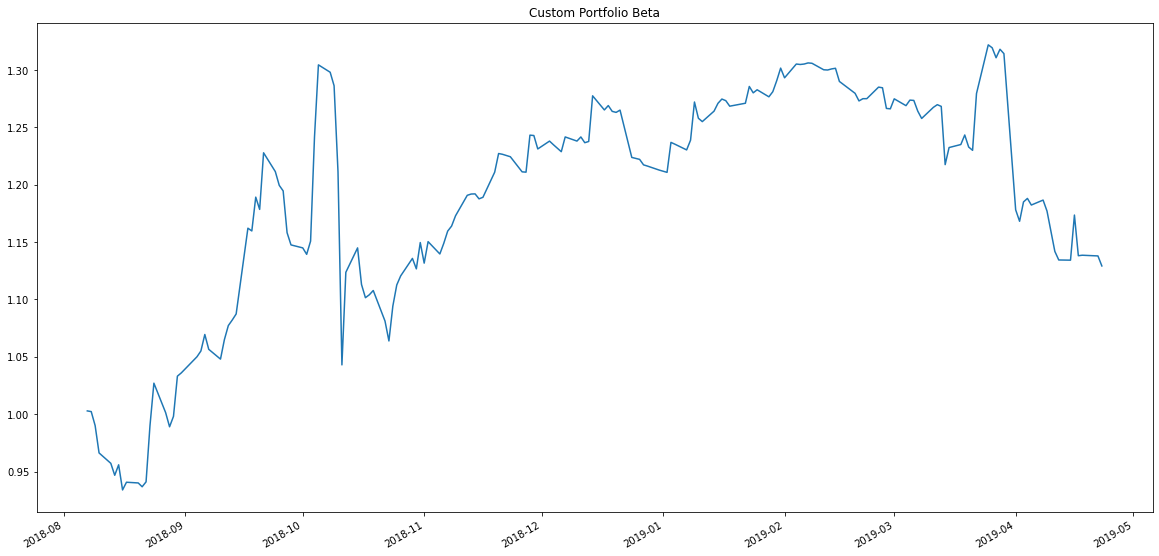

In [194]:
# Plot beta trend
df_beta_2.plot(figsize=(20,10), title='Custom Portfolio Beta')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [195]:
# Calculate Annualzied Sharpe Ratios
# Annualized Sharpe Ratios
sharpe_ratios_2 = (combine_df.mean() * 252) / (com_daily_std_1 * np.sqrt(252)) 
sharpe_ratios_2.head(10)

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
Custom                         0.933123
dtype: float64

<AxesSubplot:title={'center':'Portfolio Sharpe Ratios'}>

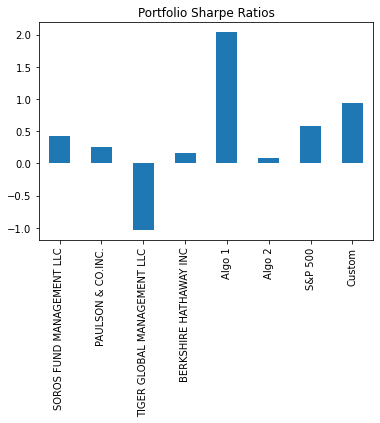

In [196]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_2.plot.bar(title='Portfolio Sharpe Ratios')

### How does your portfolio do?

Write your answer here!

Based on the Sharpe Ratio, the Custom Portfolio performes well above the market, the whales porfolios also the Algo 2 portfolio.
looking at the standard deviation, the Custom Portfolio is one of the top three portfolios with a high volatility.
The Custom Portfolio also has a high positive correlation with the S&P 500